# LABORATORIO DE INTELIGENCIA ARTIFICIAL 1

# Práctica 3: Clasificación Multiclase

+ __Estudiante 1:__ Alejandra Díaz Parra

## **0. Importar las librerías**

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

## **1. Cargar un conjunto de datos tabulares (0.5)**

### Wine Quality Data (Wine_Quality_Data.csv)

https://www.kaggle.com/datasets/ghassenkhaled/wine-quality-data

### 1.1 Ejercicio.

Cargue el conjunto de datos Wine_Quality_Data.csv

Indique breve y claramente en que consiste este dataset.

In [176]:
df = pd.read_csv('Wine_Quality_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Este dataset tiene información como el pH, color, calidad, cantidad de alcohol y otras características químicas de diferentes vinos.

## **2. Análisis Exploratorio de los Datos - Limpieza - Preparación (1.5)**

### 2.1 Ejercicio.

Determine la cantidad de observaciones y atributos e identifique la variable Target.

In [72]:
print("Atributos:")
df.columns

Atributos:


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [177]:
print("Cantidad de observaciones:")
print(len(df))

Cantidad de observaciones:
6497


In [89]:
print("Variable objetivo:")
y = df['quality']
df['quality'].value_counts()

Variable objetivo:


quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### 2.2 Ejercicio.

Determine los tipos de datos de los atributos e identifique si hay problemas con los tipos de datos o con los nombres de los atributos. En caso de existir implemente una estrategia para tratarlos.

In [75]:
print("Tipos de datos de los atributos:")
df.info()

Tipos de datos de los atributos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


De lo anterior se puede observar que todas las variables son numéricas, a excepción de 'color', por lo que deberá ser transformada a numérica.

In [178]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df["color"]=L.fit_transform(df["color"])
df['color'].value_counts()

color
1    4898
0    1599
Name: count, dtype: int64

Usando label encoding, se le asignó el valor 1 al color "white", y el valor 0 al color "red"

### 2.3 Ejercicio.

Previsualice el contenido del dataframe

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


In [78]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

### 2.4 Ejercicio.

Lleve a cabo un análisis univariado del dataset y consigne sus observaciones.

In [79]:
df.describe(include ='all')

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

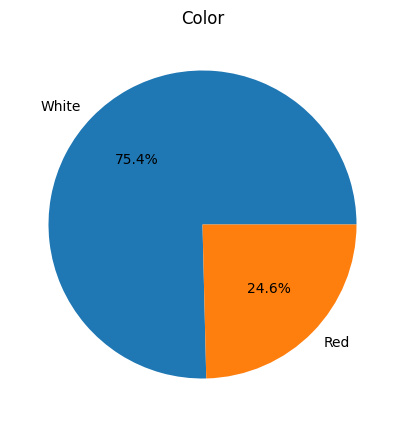

In [124]:
# grafico circular para la columna color
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(df['color'].value_counts(),labels=['White','Red'],autopct='%1.1f%%')
plt.title('Color')
plt.show()

En el anterior gráfico se ve que hay aproximadamente 3 veces más datos de vino de color blanco que de vino de color rojo

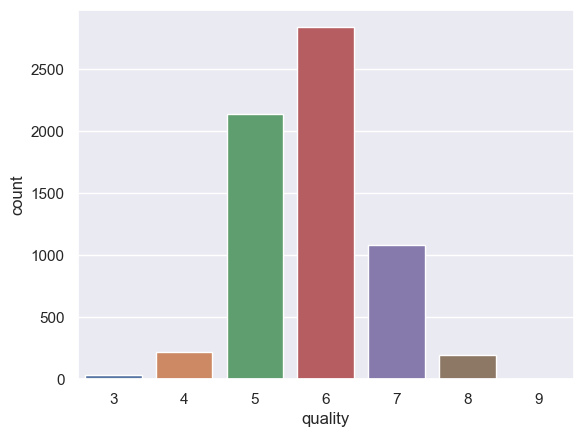

In [20]:
# grafico de barras para la columna quality
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="quality", data=df)


El anterior gráfico de barras muestra la distribución de los valores en la columna quantity, siendo los valores 5 y 6 los que más se repiten, y los valores 3 y 9 los que menos se repiten.

### 2.5 Ejercicio.

Determine la distribución de la variable Target. Indique claramente cuántas son las clases, la cantidad de registros de cada una de ellas y su porcentaje. Consigne sus observaciones.

In [82]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [83]:
df['quality'].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

quality
6    43.651%
5    32.907%
7    16.608%
4     3.325%
8     2.971%
3     0.462%
9     0.077%
Name: proportion, dtype: object

### 2.6 Ejercicio.

Genere al menos 3 histogramas y consigne sus observaciones.

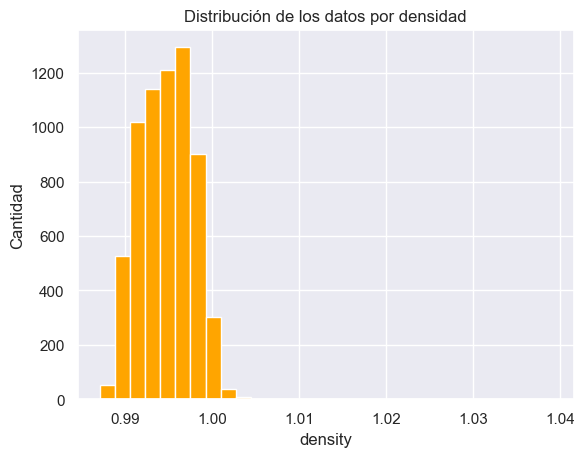

In [84]:
#Ahora generemos el histograma usando la librería matplotlib sobre la cual tenemos un poco más de control en los parámetros de la gráfica.

atribute = 'density'
valores = df[atribute].values        #Extraemos el ndarray correspondiente de la columna horsepower.
num_bins = 30                               #Número de divisiones que vamos a usar para el histograma. 
#n, bins, patches = plt.hist(valores, num_bins, density=False, facecolor='green')
plt.hist(valores, num_bins, density=False, facecolor='orange')
plt.xlabel(atribute)          #Texto en el eje x.
plt.ylabel('Cantidad')    #Texto en el eje y.
plt.title('Distribución de los datos por densidad')  #Título del gráfico. 
plt.grid(True)           #Activamos la cuadrícula.
plt.show()               #Mostramos el gráfico. 

La mayoría de los vinos usados en este estudio presentan una densidad entre 0.99 y 1.

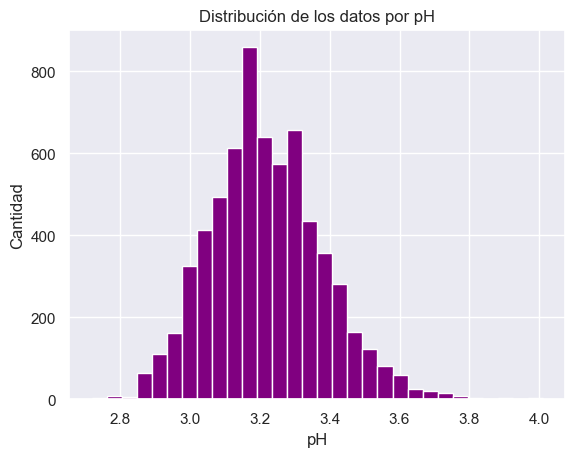

In [85]:
#Ahora generemos el histograma usando la librería matplotlib sobre la cual tenemos un poco más de control en los parámetros de la gráfica.

atribute = 'pH'
valores = df[atribute].values        #Extraemos el ndarray correspondiente de la columna horsepower.
num_bins = 30                               #Número de divisiones que vamos a usar para el histograma. 
#n, bins, patches = plt.hist(valores, num_bins, density=False, facecolor='green')
plt.hist(valores, num_bins, density=False, facecolor='purple')
plt.xlabel(atribute)          #Texto en el eje x.
plt.ylabel('Cantidad')    #Texto en el eje y.
plt.title('Distribución de los datos por pH')  #Título del gráfico. 
plt.grid(True)           #Activamos la cuadrícula.
plt.show()               #Mostramos el gráfico. 

La mayoría de los vinos usados en este estudio tienen un pH mayor a 3 y menor a 3.4, lo cual se puede considerar como ácido.

Text(0.5, 1.0, 'Calidad por color')

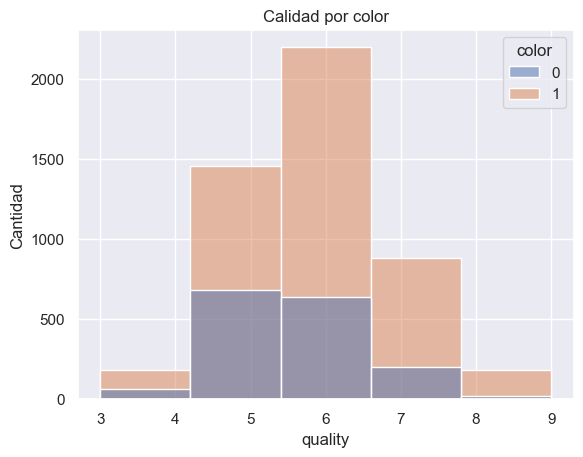

In [86]:
sns.histplot(data     = df, 
             x        = 'quality',
             bins     = 5,
             hue      = 'color',
             fill     = True,
             stat     = 'count')  #'count' muestra el número de observaciones.
                              #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                              #'density' normaliza las cuentas tal que el área del histograma es 1.
                              #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('quality') #Texto en el eje x.
plt.ylabel('Cantidad')              #Texto en el eje y.
plt.title('Calidad por color')             #Título del gráfico. 

La mayoría de los vinos usados en este estudio presentan una calidad entre 5 y 7. Hay una proporción similar de vinos rojos y blancos cuya calidad es 5. Hay una cantidad similar entre vinos rojos cuya calidad es 5 y 6. La mayor parte de vinos de calidad de 6 son blancos. Una gran cantidad de vinos blancos tiene calidad 6.

### 2.7 Ejercicio.

Realice el análisis bivariado del dataset y consigne sus observaciones.

C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


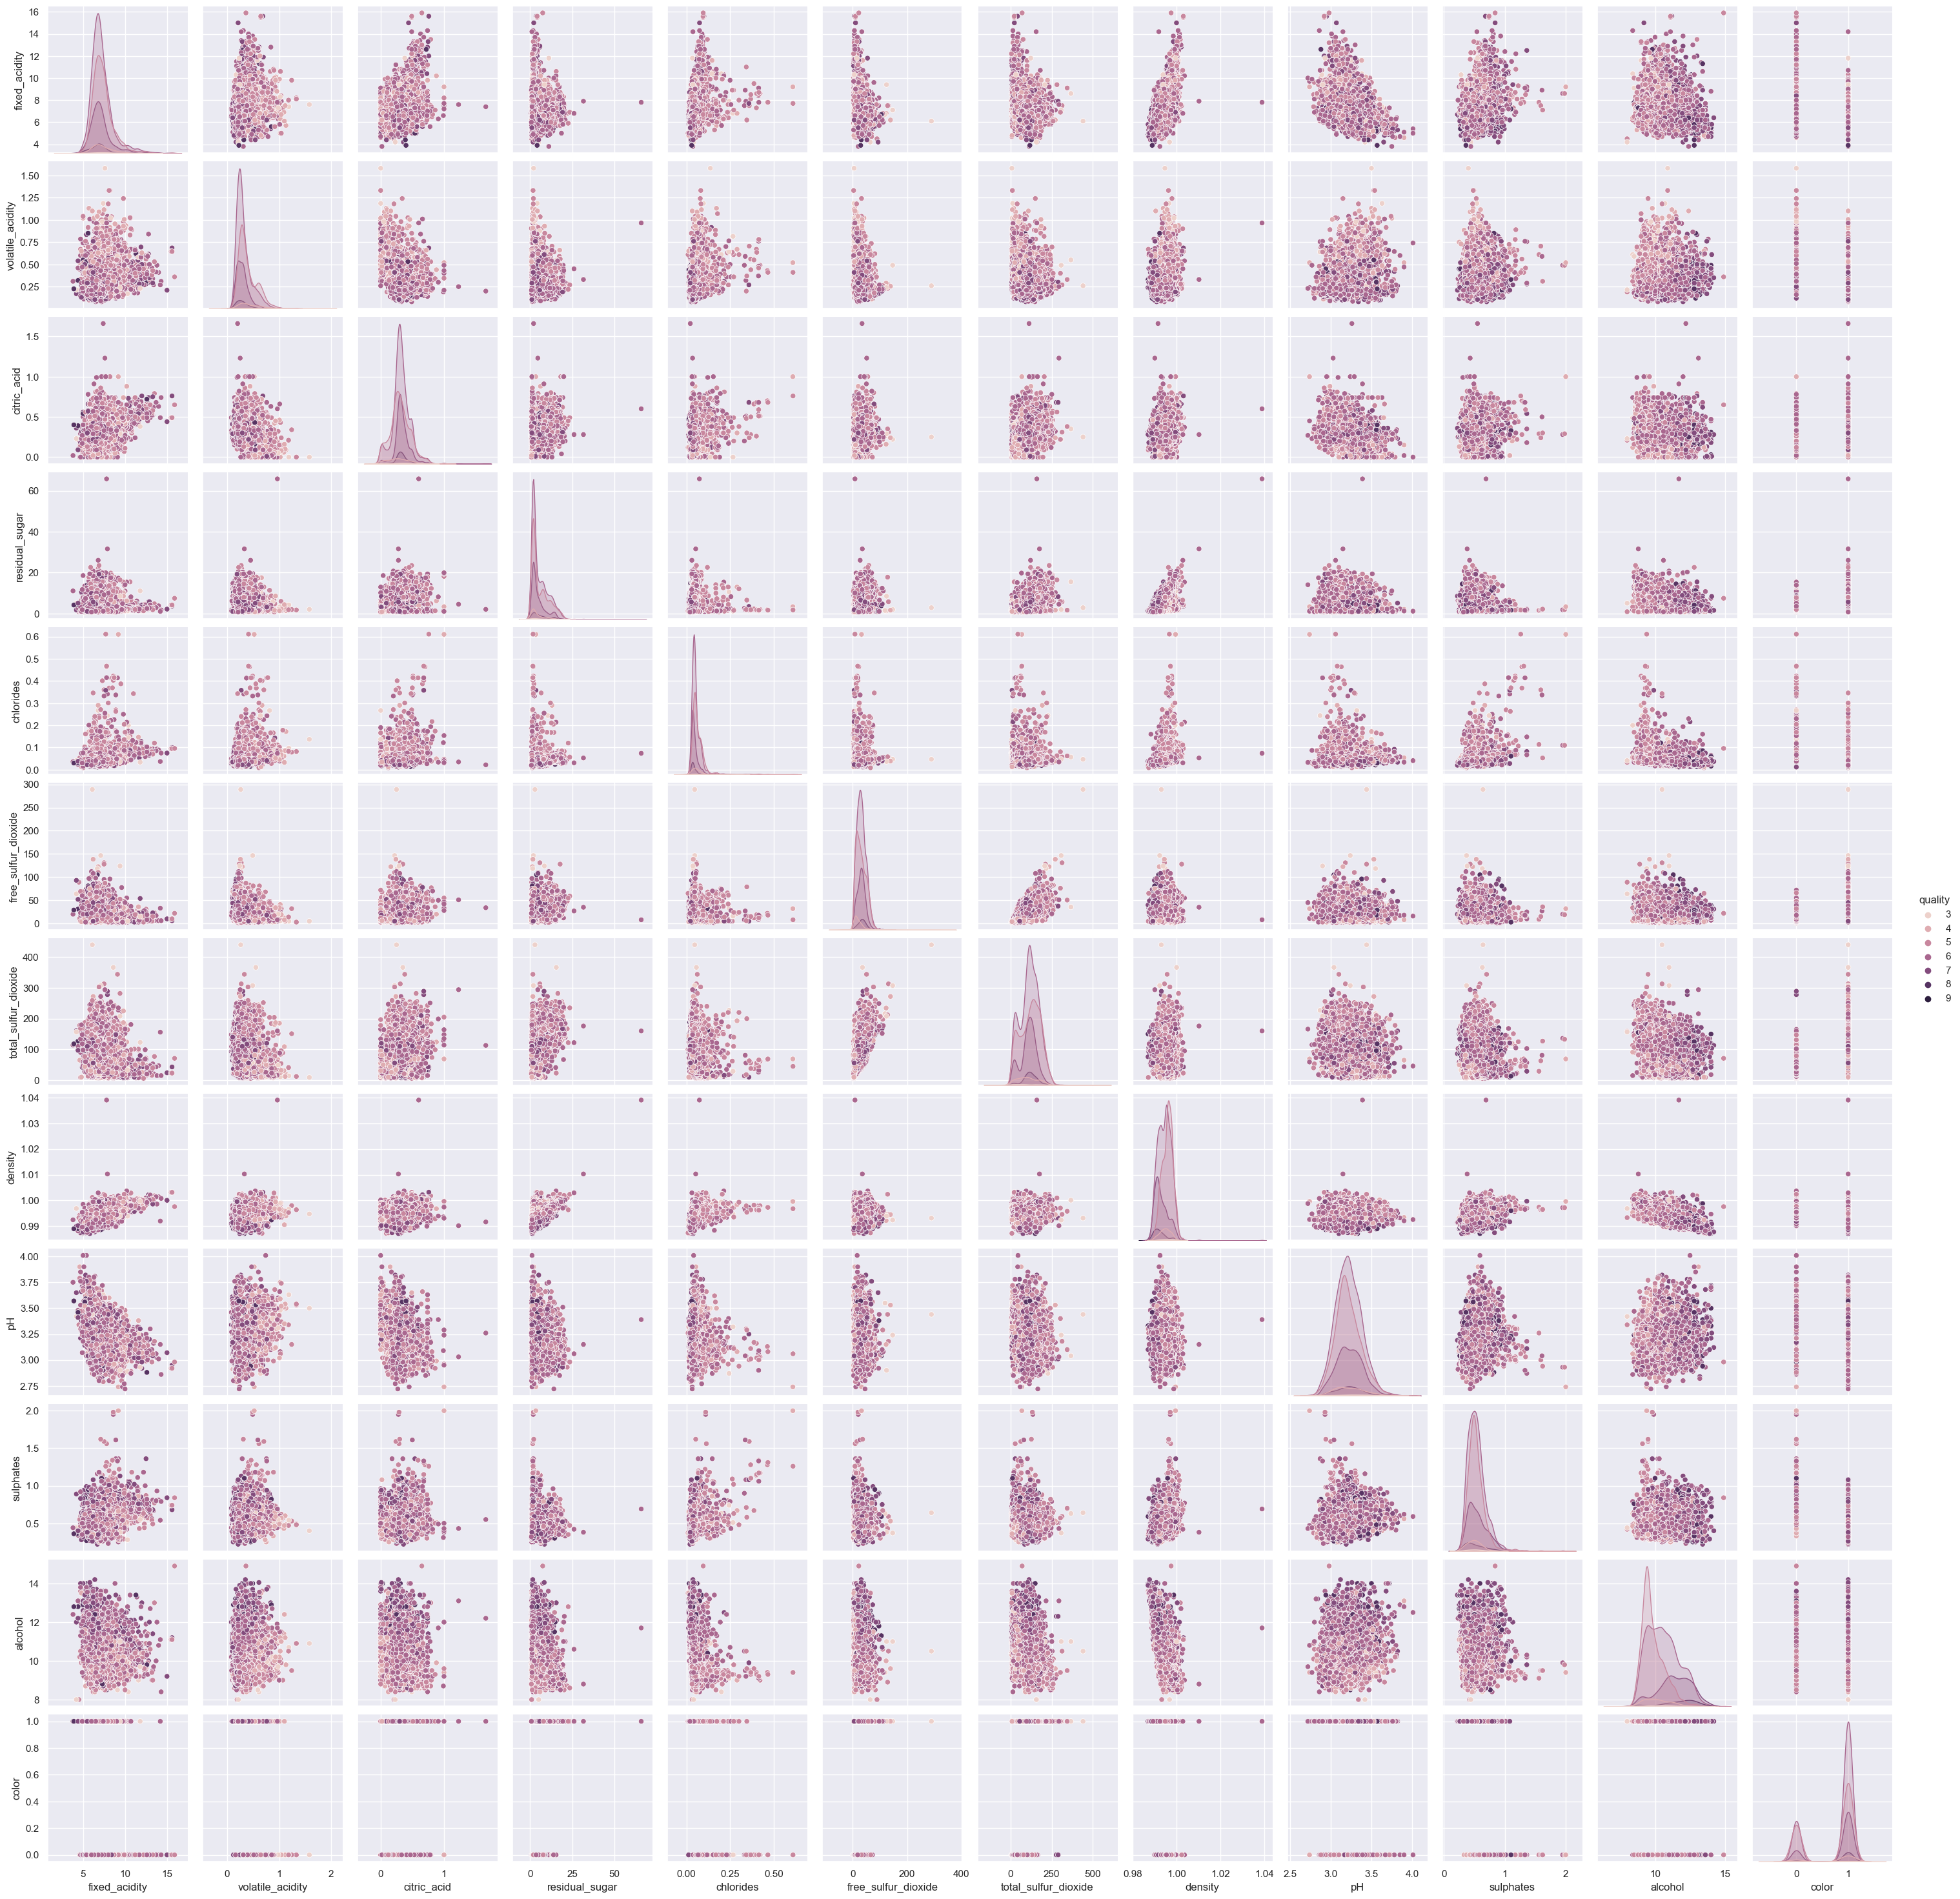

In [87]:
sns.pairplot(df, hue = 'quality')

### 2.8 Ejercicio.

Indique la correlación que tienen los atributos con la variable Target y organícelos de mayor a menor. Tenga en cuenta hacer el procesamiento adecuado de los atributos que no sean numéricos.

<Axes: >

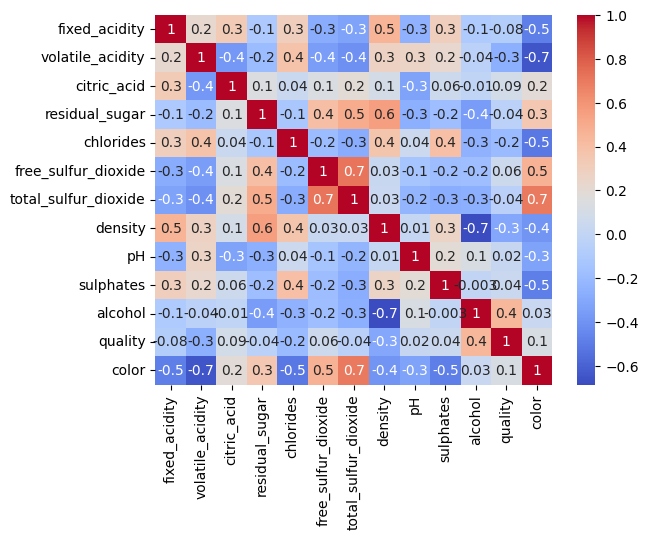

In [179]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

Correlación de los atributos con la variable "quality"
 + alcohol: 0.4
 + density: -0.3
 + volatile_acidity: -0.3
 + chlorides: -0.2
 + color: 0.1
 + citric_acid: 0.09
 + fixed_acidity: -0.08
 + free_sulfur_dioxide: 0.06
 + residual_sugar: 0.04
 + total_sulfur_dioxide: -0.04
 + sulphates: 0.04
+ pH: 0.02

### 2.9 Ejercicio.

Identifique si hay datos repetidos y datos nulos. En caso de existir implemente una estrategia para tratarlos.

In [180]:
df_copy = df.copy()

In [110]:
df_copy.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

El dataset no tiene datos nulos.

In [181]:
df_copy.duplicated().sum()

1177

El dataset presenta 1177 valores duplicados, los cuales serán eliminados.

In [182]:
df_copy = df_copy.drop_duplicates()
df_copy.duplicated().sum()

0

### 2.10 Ejercicio.

Identifique si hay outliers. En caso de existir implemente una estrategia para tratarlos.

In [184]:
import numpy as np

def outliers(df_copy, atribute):

    arr1 = df_copy[atribute].values

    # Encontrar el 1st quartil
    q1 = np.quantile(arr1, 0.25)

    # Encontrar el 3rd quartil
    q3 = np.quantile(arr1, 0.75)

    # Encontrar el 2nd quartil
    med = np.median(arr1)

    # Encontrar el rango inter quartil (iqr)
    iqr = q3-q1

    # Encontrar los bigotes superior e inferior
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers_l = arr1[(arr1 <= lower_bound)]
    outliers_u = arr1[(arr1 >= upper_bound)]



    outliers_l_p = (outliers_l.size/len(df_copy[atribute]))*100
    outliers_u_p = (outliers_u.size/len(df_copy[atribute]))*100


    if(outliers_l.size != 0):
      print('Lower outliers in {} represent {:.4f}% of data'.format(atribute,outliers_l_p))
      print('>>>Lower bound: {}'.format(lower_bound))
      #print('Lower outliers in {} : {}'.format(atribute,outliers_l))
    if(outliers_u.size != 0):
      print('Upper outliers in {} represent {:.4f}% of data'.format(atribute,outliers_u_p))
      print('>>>Upper bound: {}'.format(upper_bound))
      #print('Upper outliers in {} : {}'.format(atribute,outliers_u))
    
    


In [185]:
for col in df_copy.columns:
  outliers(df_copy, col)

Lower outliers in fixed_acidity represent 0.1316% of data
>>>Lower bound: 4.450000000000001
Upper outliers in fixed_acidity represent 5.5827% of data
>>>Upper bound: 9.65
Upper outliers in volatile_acidity represent 5.2444% of data
>>>Upper bound: 0.6799999999999999
Upper outliers in citric_acid represent 2.6880% of data
>>>Upper bound: 0.6400000000000001
Upper outliers in residual_sugar represent 2.7256% of data
>>>Upper bound: 16.05
Upper outliers in chlorides represent 4.4549% of data
>>>Upper bound: 0.10800000000000001
Upper outliers in free_sulfur_dioxide represent 0.8271% of data
>>>Upper bound: 78.5
Upper outliers in total_sulfur_dioxide represent 0.1880% of data
>>>Upper bound: 272.125
Upper outliers in density represent 0.0564% of data
>>>Upper bound: 1.0036250000000002
Lower outliers in pH represent 0.0752% of data
>>>Lower bound: 2.7799999999999994
Upper outliers in pH represent 0.9774% of data
>>>Upper bound: 3.66
Upper outliers in sulphates represent 3.0639% of data
>>>Upp

Para tratar los outliers se van a eliminar todos los valores en las columnas que presenten outliers, que cumplan con estar por encima o por debajo de los límites mostrados anteriormente.

In [186]:
# erase all outliers
df_copy = df_copy[(df_copy['fixed_acidity'] > 4.45) | (df_copy['fixed_acidity'] < 9.65)]
df_copy = df_copy[df_copy['volatile_acidity'] < 0.679]
df_copy = df_copy[df_copy['citric_acid'] < 0.64]
df_copy = df_copy[df_copy['residual_sugar'] < 16.05]
df_copy = df_copy[df_copy['chlorides'] < 0.108]
df_copy = df_copy[df_copy['free_sulfur_dioxide'] < 78.5]
df_copy = df_copy[df_copy['total_sulfur_dioxide'] < 272.125]
df_copy = df_copy[df_copy['density'] < 1.004]
df_copy = df_copy[(df_copy['pH'] > 2.78) | (df_copy['pH'] < 3.66)]
df_copy = df_copy[df_copy['sulphates'] < 0.855]
df_copy = df_copy[df_copy['alcohol'] < 14.25]
#df_copy = df_copy[(df_copy['quality'] > 3.5) | (df_copy['quality'] < 7.5)]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled =df_scaled.drop(['quality','color'], axis=1)
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.describe()

In [98]:
# scale data using robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_copy = df_copy.drop(columns=['quality','color'])
df_copy = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)
df_copy.head()


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.307692          2.222222      -1.9375       -0.140351   1.035714   
1       0.615385          3.222222      -1.9375       -0.017544   1.821429   
2       0.615385          2.555556      -1.6875       -0.070175   1.607143   
3       3.230769         -0.111111       1.5625       -0.140351   1.000000   
4       0.307692          2.000000      -1.9375       -0.157895   1.000000   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0                -0.68             -1.034700  0.689278  1.363636   0.294118   
1                -0.12             -0.618297  0.470460 -0.045455   1.000000   
2                -0.52             -0.782334  0.514223  0.227273   0.823529   
3                -0.44             -0.706625  0.733042 -0.227273   0.411765   
4                -0.60             -0.958991  0.689278  1.363636   0.294118   

    alcohol  color  
0 -0.526316   -1.0  
1 -0.315789   -1.0  
2 -0.315789   -1.0  
3 -0.315789   -1.0  
4 -0.526316   -1.0

In [187]:
df_copy.value_counts()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  pH    sulphates  alcohol  quality  color
3.8            0.310             0.02         11.10           0.036      20.0                 114.0                 0.99248  3.75  0.44       12.4     6        1        1
7.3            0.320             0.34         6.60            0.032      24.0                 112.0                 0.99505  3.22  0.46       9.8      6        1        1
               0.340             0.21         3.20            0.050      14.0                 136.0                 0.99360  3.25  0.44       10.2     5        1        1
               0.330             0.47         2.10            0.077      5.0                  11.0                  0.99580  3.33  0.53       10.3     6        0        1
                                 0.40         6.85            0.038      32.0                 138.0                 0.99200  3.03  0.30       11.9    

### 2.11 Ejercicio.

Depués de haber hecho la limpieza básica, indique la correlación que tienen los atributos con la variable Target y organícelos de mayor a menor. Tenga en cuanta hacer el procesamiento adecuado de los atributos que no sean numéricos.

In [188]:
df_copy = df_copy.reset_index(drop=True)

In [189]:
df_copy.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           11.2              0.28         0.56             1.9      0.075   
1            7.4              0.66         0.00             1.8      0.075   
2            7.9              0.60         0.06             1.6      0.069   
3            7.3              0.65         0.00             1.2      0.065   
4            7.8              0.58         0.02             2.0      0.073   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  59.0   0.9964  3.30       0.46   
3                 15.0                  21.0   0.9946  3.39       0.47   
4                  9.0                  18.0   0.9968  3.36       0.57   

   alcohol  quality  color  
0      9.8        6      0  
1      9.4        5      0  
2      9.4        5      0  
3     10.0        7      0  
4      9.5        7      0

<Axes: >

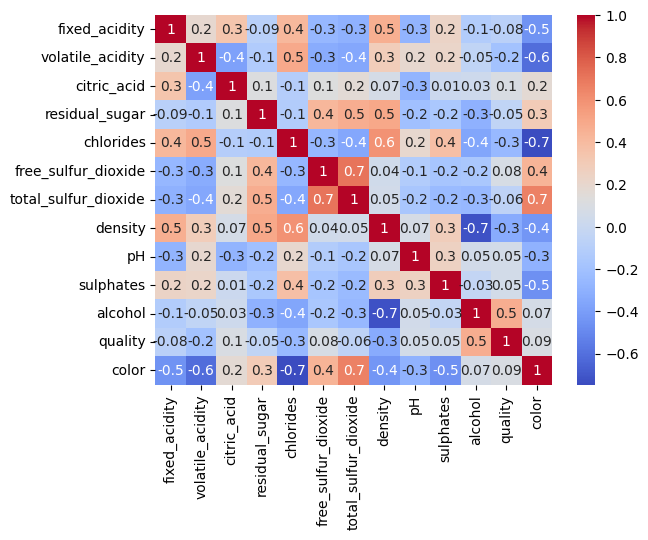

In [190]:
import seaborn as sns
sns.heatmap(df_copy.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

Correlación de los atributos con la variable "quality"
 + color: 0.1
 + volatile_acidity: -0.1
 + chlorides: -0.08
 + total_sulfur_dioxide: 0.07
 + free_sulfur_dioxide: 0.06
 + sulphates: -0.06
 + residual_sugar: 0.05
 + citric_acid: 0.05
 + pH: -0.04
 + fixed_acidity: -0.04
 + alcohol: 0.004
 + density: -0.03
 
 

# **3. Modelo y 4. Evaluación (3.0)**

### 3.1 Ejercicio.

Seleccione el conjunto de atributos que va a usar para entrenar el primer modelo de clasificación. Indique claramente por qué escogió esos atributos.

De la matriz de correlación anterior se puede observar que los atributos "density" y "alcohol" presentan una correlación alta entre ellos, por lo que, al tener menor correlación con la variable objetivo, se descartó el atributo "alcohol". A su vez "total_sulfur_dioxide" presenta una alta correlación con los atributos "free_sulfur_dioxide" y "color", por lo cual se decidió descartar el primero. Teniendo en cuenta lo anterior, la lista final de atributos para entrenar el modelo consta de:
 + density
 + volatile_acidity
 + chlorides
 + color
 + citric_acid
 + fixed_acidity
 + free_sulfur_dioxide
 + residual_sugar
 + sulphates
 + pH

# PROBAR QUITANDO ATRIBUTOS DE LAS SGTES COMBINACIONES:
total sulfur dioxide - free sulfur dioxide
total sulfur dioxide - color
alcohol - density
chlorides  - color

In [104]:
# drop all columns with correlation less than 0.1
df_copy = df_copy.drop(["alcohol", "total_sulfur_dioxide"], axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed_acidity        5320 non-null   float64
 1   volatile_acidity     5320 non-null   float64
 2   citric_acid          5320 non-null   float64
 3   residual_sugar       5320 non-null   float64
 4   chlorides            5320 non-null   float64
 5   free_sulfur_dioxide  5320 non-null   float64
 6   density              5320 non-null   float64
 7   pH                   5320 non-null   float64
 8   sulphates            5320 non-null   float64
 9   color                5320 non-null   float64
 10  quality              5320 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 457.3 KB


### 3.2 Ejercicio.

Construya cuatro modelos de clasificación utilizando los siguientes algoritmos:

- KNN
- Regresión Logística
- Ensembles.
- Otro método de su elección.

Entrene y evalúe el desempeño de los modelos por clase usando las métricas:

- Accuracy
- Precision
- Recall
- F1 score

Evalúe el desempeño general del modelo usando las métricas:

- Average Accuracy
- Average Precision
- Average Recall
- Average F1 score

Consigne sus observaciones, por ejemplo, cuáles clases se clasifican mejor, etc.

Compare el desempeño de los modelos usando las diferentes métricas y la curva ROC. Consigne sus observaciones.

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

y = df_copy['quality'].values
X = df_copy.drop(['quality'], axis=1).values

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<class 'numpy.ndarray'>
(4435,)
<class 'numpy.ndarray'>
(4435, 12)


#### KNN

In [166]:
# knn model using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)


{'n_neighbors': 24}


Desempeño general del modelo

In [167]:
#print train accuracy
print(f'Train Accuracy - : {knn_cv.score(X_train,y_train):.3f}')
# print train precision
y_pred = knn_cv.predict(X_train)
print(f'Train Precision - : {precision_score(y_train, y_pred, average="macro"):.3f}')
# print train recall
print(f'Train Recall - : {recall_score(y_train, y_pred, average="macro"):.3f}')
# print train f1-score
print(f'Train F1-score - : {f1_score(y_train, y_pred, average="macro"):.3f}')

# print test accuracy
print(f'Test Accuracy - : {knn_cv.score(X_test,y_test):.3f}')
#print test precision
y_pred = knn_cv.predict(X_test)
print(f'Test Precision - : {precision_score(y_test, y_pred, average="macro"):.3f}')
#print test recall
print(f'Test Recall - : {recall_score(y_test, y_pred, average="macro"):.3f}')
#print test f1-score
print(f'Test F1-score - : {f1_score(y_test, y_pred, average="macro"):.3f}')

Train Accuracy - : 0.503
Train Precision - : 0.210
Train Recall - : 0.193
Train F1-score - : 0.184
Test Accuracy - : 0.477
Test Precision - : 0.224
Test Recall - : 0.211
Test F1-score - : 0.202


c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Desempeño por clase del modelo

In [169]:
# performance by class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        38
           5       0.44      0.43      0.43       275
           6       0.50      0.71      0.59       406
           7       0.40      0.13      0.19       135
           8       0.00      0.00      0.00        30

    accuracy                           0.48       887
   macro avg       0.22      0.21      0.20       887
weighted avg       0.43      0.48      0.43       887



c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Regresión Logística

In [53]:
# logistic regression using gridsearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

param_grid = {'C': np.arange(1, 30), 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'max_iter': [1000, 3000, 5000]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
print(logreg_cv.best_params_)

{'C': 2, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


Desempeño general del modelo

In [54]:
# print accuracy
print(f'Train Accuracy - : {logreg_cv.score(X_train,y_train):.3f}')
# print precision
y_pred = logreg_cv.predict(X_train)
print(f'Train Precision - : {precision_score(y_train, y_pred, average="macro"):.3f}')
# print recall
print(f'Train Recall - : {recall_score(y_train, y_pred, average="macro"):.3f}')
# print f1-score
print(f'Train F1-score - : {f1_score(y_train, y_pred, average="macro"):.3f}')

# print accuracy
print(f'Test Accuracy - : {logreg_cv.score(X_test,y_test):.3f}')
# print precision
y_pred = logreg_cv.predict(X_test)
print(f'Test Precision - : {precision_score(y_test, y_pred, average="macro"):.3f}')
# print recall
print(f'Test Recall - : {recall_score(y_test, y_pred, average="macro"):.3f}')
# print f1-score
print(f'Test F1-score - : {f1_score(y_test, y_pred, average="macro"):.3f}')

Train Accuracy - : 0.534
Train Precision - : 0.458
Train Recall - : 0.232
Train F1-score - : 0.212
Test Accuracy - : 0.523
Test Precision - : 0.273
Test Recall - : 0.232
Test F1-score - : 0.207


c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Desempeño por clase del modelo

In [55]:
#performance by class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        46
           5       0.60      0.61      0.61       352
           6       0.48      0.75      0.59       429
           7       0.56      0.03      0.05       182
           8       0.00      0.00      0.00        21

    accuracy                           0.52      1037
   macro avg       0.27      0.23      0.21      1037
weighted avg       0.50      0.52      0.46      1037



c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Ensembles

In [172]:
# ensembles using gridsearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

#select criterion
criterion = ['gini', 'entropy']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt'] # PROBAR CON LOG2 EN VEZ DE AUTO
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {  'criterion' : criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 64}


Desempeño general del modelo

In [173]:
# print accuracy
print(f'Train Accuracy - : {rf_cv.score(X_train,y_train):.3f}')
# print precision
y_pred = rf_cv.predict(X_train)
print(f'Train Precision - : {precision_score(y_train, y_pred, average="macro"):.3f}')
# print recall
print(f'Train Recall - : {recall_score(y_train, y_pred, average="macro"):.3f}')
# print f1-score
print(f'Train F1-score - : {f1_score(y_train, y_pred, average="macro"):.3f}')

# print accuracy
print(f'Test Accuracy - : {rf_cv.score(X_test,y_test):.3f}')
# print precision
y_pred = rf_cv.predict(X_test)
print(f'Test Precision - : {precision_score(y_test, y_pred, average="macro"):.3f}')
# print recall
print(f'Test Recall - : {recall_score(y_test, y_pred, average="macro"):.3f}')
# print f1-score
print(f'Test F1-score - : {f1_score(y_test, y_pred, average="macro"):.3f}')


Train Accuracy - : 0.557
Train Precision - : 0.260
Train Recall - : 0.213
Train F1-score - : 0.205
Test Accuracy - : 0.534
Test Precision - : 0.269
Test Recall - : 0.225
Test F1-score - : 0.207


c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Desempeño por clase del modelo

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        46
           5       0.62      0.59      0.61       352
           6       0.48      0.77      0.59       429
           7       0.68      0.07      0.13       182
           8       0.00      0.00      0.00        21

    accuracy                           0.53      1037
   macro avg       0.30      0.24      0.22      1037
weighted avg       0.53      0.53      0.47      1037



c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Redes Neuronales

In [174]:
# use gridsearch to find the best parameters
mlp = MLPClassifier(random_state = 0, max_iter = 500)
nn_Grid = GridSearchCV(estimator = mlp, param_grid =  { 'hidden_layer_sizes': [(10,8,5), (30,20,10), (20,15,10)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive'] } )
nn_Grid.fit(X_train, y_train)

# best parameters
print(nn_Grid.best_params_)
                            

c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20, 15, 10), 'learning_rate': 'constant', 'solver': 'adam'}


Desempeño general del modelo

In [175]:
# print accuracy for train
print(f'Train Accuracy - : {nn_Grid.score(X_train,y_train):.3f}')
# print precision for train
y_pred = nn_Grid.predict(X_train)
print(f'Train Precision - : {precision_score(y_train, y_pred, average="macro"):.3f}')
# print recall for train
print(f'Train Recall - : {recall_score(y_train, y_pred, average="macro"):.3f}')
# print f1-score for train
print(f'Train F1-score - : {f1_score(y_train, y_pred, average="macro"):.3f}')

# print accuracy for test
print(f'Test Accuracy - : {nn_Grid.score(X_test,y_test):.3f}')
# print precision for test
y_pred = nn_Grid.predict(X_test)
print(f'Test Precision - : {precision_score(y_test, y_pred, average="macro"):.3f}')
# print recall for test
print(f'Test Recall - : {recall_score(y_test, y_pred, average="macro"):.3f}')
# print f1-score for test
print(f'Test F1-score - : {f1_score(y_test, y_pred, average="macro"):.3f}')

Train Accuracy - : 0.529
Train Precision - : 0.286
Train Recall - : 0.227
Train F1-score - : 0.228
Test Accuracy - : 0.515
Test Precision - : 0.256
Test Recall - : 0.254
Test F1-score - : 0.246


c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Desempeño por clase del modelo

In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # y pred predice los valores de x_test

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        38
           5       0.57      0.33      0.42       275
           6       0.52      0.75      0.61       406
           7       0.44      0.44      0.44       135
           8       0.00      0.00      0.00        30

    accuracy                           0.52       887
   macro avg       0.26      0.25      0.25       887
weighted avg       0.48      0.52      0.48       887



c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### _Nota_: para observar una comparación entre las métricas generales de cada modelo, refiérase al excel "metrics" en el directorio del proyecto.

### 3.3 Ejercicio.

Utilice Stratified Cross-Validation para evaluar la calidad de los modelos.

Indique cuál es la utilidad que tiene el método de evaluación Stratified Cross-Validation. Consigne sus observaciones respecto a la implementación y los resultados obtenidos.

### 3.4 Ejercicio

Modifique uno de los modelos de tal manera que el Accuracy (macro) se acerque lo más posible a 0.99. Recuerde que puede cambiar de atributos o los hiperparámetros del modelo. Indique por qué escogió ese modelo y qué cambios realizó.